In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker 


In [20]:
data = pd.read_excel('./annex_1_complaint_report_modified.xlsx', header = 0)
# Verifying that the code has been correctly loaded
print(data.head())

   talk_time  duration media_type  case_number  email_subject  \
0        913      1012      VOICE          NaN  No disponible   
1        328       556      VOICE          NaN  No disponible   
2        413       779      VOICE          NaN  No disponible   
3        140       292      VOICE          NaN  No disponible   
4        185       249      VOICE          NaN  No disponible   

                   Comments                           call Id  
0  Incorrect \nmeasurements  11D2F6EAA16B4E32BC16AF65E883D25F  
1  Incorrect \nmeasurements  E37FEA3A6DD140F093F0C78E570FFA27  
2  Incorrect \nmeasurements  17566D0DC8AA46DDBD57EA940CE0CB48  
3           Delivery \nlate  4C3D49E3A37149738F95B26CF52D4B61  
4  Incorrect \nmeasurements  E3FADE0FAD7440F3B34A8938CC9B075D  


In [21]:
# The column to be anlizar of the xlsx is -> Comments
comments_column = 'Comments'

#Calculate the frequency of the values in the selected column
frequency = data[comments_column].value_counts()
frequency = frequency.sort_values(ascending=False)

# # Calculate the frequency of the values in the selected column.
frequency_response = data[comments_column].value_counts()
frequency_question = data[comments_column].value_counts()

# Calculate the cumulative frequency
accumulated_frecuency = frequency.cumsum() / frequency.sum() * 100

/Users/daniell/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/daniell/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/daniell/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


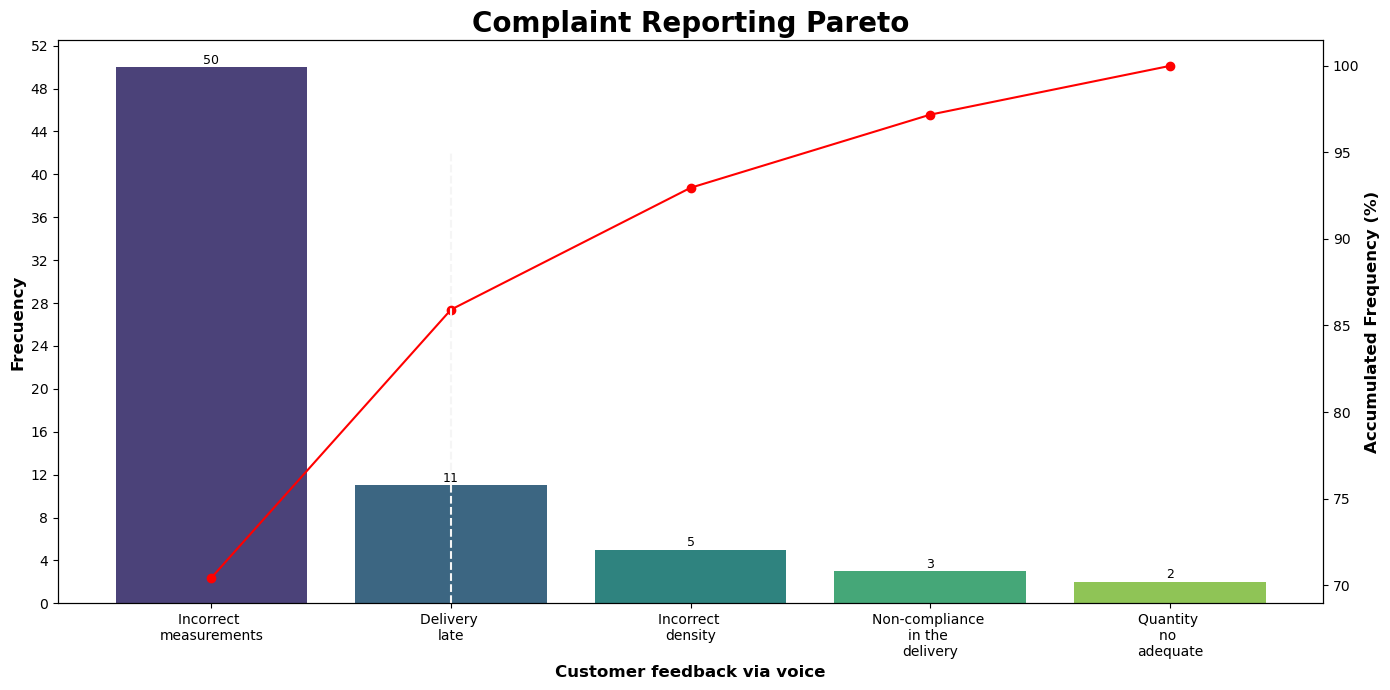

In [22]:
# Create the Pareto chart
fig, ax1 = plt.subplots(figsize=(14, 7))

# Bar chart / frequencies
sns.barplot(x=frequency.index, y=frequency.values, palette='viridis', ax=ax1)
ax1.set_ylabel('Frecuency', fontweight='bold', size=12)

# Set the interval on the y-axis
ax1.yaxis.set_major_locator(ticker.MultipleLocator(4))


# Line graph (right) for cumulative frequency
ax2 = ax1.twinx()
ax2.plot(accumulated_frecuency.index, accumulated_frecuency.values, color='red', marker='o')
ax2.set_ylabel('Accumulated Frequency (%)', fontweight='bold', size=12)

# Añadir línea punteada en el 80% de la frecuencia acumulada
point_80 = accumulated_frecuency[accumulated_frecuency >= 80].index[0]
plt.axvline(x=point_80, color='whitesmoke', linestyle='--', ymin=0, ymax=80/100, label='80% Accumulated Frequency')

# Format settings
ax1.set_xlabel('Customer feedback via voice', fontweight='bold', size=12)
ax1.set_title('Complaint Reporting Pareto', fontweight='bold', size=20)

# Rotate labels vertically on the x-axis
plt.xticks(rotation='vertical')

# Rotate labels vertically on the x-axis
for p in ax1.patches:
    ax1.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()
plt.show()